In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.cluster import KMeans

In [2]:
df = pd.read_csv('data.csv')
df.head()

,TransactionID,CustomerID,CustomerDOB,CustGender,CustLocation,CustAccountBalance,TransactionDate,TransactionTime,TransactionAmount (INR)
0,T1,C5841053,10/1/94,F,JAMSHEDPUR,17819.05,2/8/16,143207,25.0
1,T2,C2142763,4/4/57,M,JHAJJAR,2270.69,2/8/16,141858,27999.0
2,T3,C4417068,26/11/96,F,MUMBAI,17874.44,2/8/16,142712,459.0
3,T4,C5342380,14/9/73,F,MUMBAI,866503.21,2/8/16,142714,2060.0
4,T5,C9031234,24/3/88,F,NAVI MUMBAI,6714.43,2/8/16,181156,1762.5


In [3]:
df.shape

(1048567, 9)

In [4]:
df.describe()

,CustAccountBalance,TransactionTime,TransactionAmount (INR)
count,1.046198e+06,1.048567e+06,1.048567e+06
mean,1.154035e+05,1.570875e+05,1.574335e+03
std,8.464854e+05,5.126185e+04,6.574743e+03
min,0.000000e+00,0.000000e+00,0.000000e+00
25%,4.721760e+03,1.240300e+05,1.610000e+02
50%,1.679218e+04,1.642260e+05,4.590300e+02
75%,5.765736e+04,2.000100e+05,1.200000e+03
max,1.150355e+08,2.359590e+05,1.560035e+06


In [5]:
df.dtypes

TransactionID               object
CustomerID                  object
CustomerDOB                 object
CustGender                  object
CustLocation                object
CustAccountBalance         float64
TransactionDate             object
TransactionTime              int64
TransactionAmount (INR)    float64
dtype: object

In [6]:
df.isna().sum()

TransactionID                 0
CustomerID                    0
CustomerDOB                3397
CustGender                 1100
CustLocation                151
CustAccountBalance         2369
TransactionDate               0
TransactionTime               0
TransactionAmount (INR)       0
dtype: int64

In [7]:
df.dropna(inplace=True)

In [8]:
df.duplicated().sum()

0

In [9]:
df['CustGender'].value_counts()

M    760978
F    280635
T         1
Name: CustGender, dtype: int64

In [10]:
df[df['CustGender'] == 'T']

,TransactionID,CustomerID,CustomerDOB,CustGender,CustLocation,CustAccountBalance,TransactionDate,TransactionTime,TransactionAmount (INR)
959987,T959988,C3380368,1/1/1800,T,CHENNAI,50050.0,10/9/16,170731,32500.0


In [11]:
df[df['CustomerID'] == 'C3380368']

,TransactionID,CustomerID,CustomerDOB,CustGender,CustLocation,CustAccountBalance,TransactionDate,TransactionTime,TransactionAmount (INR)
959987,T959988,C3380368,1/1/1800,T,CHENNAI,50050.0,10/9/16,170731,32500.0


In [12]:
df.loc[959987, 'CustGender'] = 'M'

In [13]:
# df['CustLocation'] = df['CustLocation'].apply(lambda x: re.sub("([\(\[]).*?([\)\]])", "\g<1>\g<2>", x))

In [14]:
df['TransactionDate'] = pd.to_datetime(df['TransactionDate'])
df['CustomerDOB'] = pd.to_datetime(df['CustomerDOB'])

In [15]:
df.shape

(1041614, 9)

In [16]:
import datetime

def fix_date(x):
    if x.year > 2023:
        year = x.year - 100
#     elif x.year <= 1823:
#         year = x.year + 200;
    else:
        year = x.year

    return datetime.date(year,x.month,x.day)

In [17]:
df['CustomerDOB'] = df['CustomerDOB'].apply(fix_date)
df['TransactionDate'] = df['TransactionDate'].apply(fix_date)

In [18]:
df['TransactionDate'] = pd.to_datetime(df['TransactionDate'])
df['CustomerDOB'] = pd.to_datetime(df['CustomerDOB'])

In [19]:
df.dtypes

TransactionID                      object
CustomerID                         object
CustomerDOB                datetime64[ns]
CustGender                         object
CustLocation                       object
CustAccountBalance                float64
TransactionDate            datetime64[ns]
TransactionTime                     int64
TransactionAmount (INR)           float64
dtype: object

In [20]:
df['Age'] = df['TransactionDate'].dt.year - df['CustomerDOB'].dt.year

In [21]:
df.head()

,TransactionID,CustomerID,CustomerDOB,CustGender,CustLocation,CustAccountBalance,TransactionDate,TransactionTime,TransactionAmount (INR),Age
0,T1,C5841053,1994-10-01,F,JAMSHEDPUR,17819.05,2016-02-08,143207,25.0,22
1,T2,C2142763,1957-04-04,M,JHAJJAR,2270.69,2016-02-08,141858,27999.0,59
2,T3,C4417068,1996-11-26,F,MUMBAI,17874.44,2016-02-08,142712,459.0,20
3,T4,C5342380,1973-09-14,F,MUMBAI,866503.21,2016-02-08,142714,2060.0,43
4,T5,C9031234,1988-03-24,F,NAVI MUMBAI,6714.43,2016-02-08,181156,1762.5,28


In [22]:
df['CustomerID'].nunique()

879358

In [23]:
df['TransactionDate1'] = df['TransactionDate']
df['TransactionDate2'] = df['TransactionDate']

In [24]:
ndf = df.groupby('CustomerID').agg({
    'TransactionID': 'count',
    'CustGender': 'first',
    'CustLocation': 'first',
    'CustAccountBalance': 'mean',
    'TransactionAmount (INR)': 'mean',
    'Age': 'median',
    'TransactionDate2': 'max',
    'TransactionDate1': 'min',
    'TransactionDate': 'median'
})

ndf = ndf.reset_index()

In [25]:
ndf.head()
ndf.shape

(879358, 10)

In [26]:
ndf['CustomerID'].nunique()

879358

In [27]:
ndf.drop(columns=['CustomerID'], inplace=True)
ndf.rename(columns={"TransactionID": "Frquency"}, inplace=True)
ndf['recency'] = ndf['TransactionDate2'] - ndf['TransactionDate1']
ndf['recency'] = ndf['recency'].astype(str)

In [28]:
ndf.head()

,Frquency,CustGender,CustLocation,CustAccountBalance,TransactionAmount (INR),Age,TransactionDate2,TransactionDate1,TransactionDate,recency
0,2,F,NOIDA,76340.635,2553.0,28.5,2016-09-26,2016-09-08,2016-09-17,18 days
1,1,M,MUMBAI,24204.490,1499.0,22.0,2016-08-14,2016-08-14,2016-08-14,0 days
2,2,F,MUMBAI,100112.950,727.5,28.0,2016-07-08,2016-01-08,2016-04-08,182 days
3,1,F,CHAMPARAN,496.180,30.0,26.0,2016-09-15,2016-09-15,2016-09-15,0 days
4,1,M,KOLKATA,87058.650,5000.0,51.0,2016-08-18,2016-08-18,2016-08-18,0 days


In [29]:
import re

In [30]:
ndf['recency'] = ndf['recency'].apply(lambda x: re.search('\d+', x).group())
ndf['recency'] = ndf['recency'].astype(int)
ndf.head()

,Frquency,CustGender,CustLocation,CustAccountBalance,TransactionAmount (INR),Age,TransactionDate2,TransactionDate1,TransactionDate,recency
0,2,F,NOIDA,76340.635,2553.0,28.5,2016-09-26,2016-09-08,2016-09-17,18
1,1,M,MUMBAI,24204.490,1499.0,22.0,2016-08-14,2016-08-14,2016-08-14,0
2,2,F,MUMBAI,100112.950,727.5,28.0,2016-07-08,2016-01-08,2016-04-08,182
3,1,F,CHAMPARAN,496.180,30.0,26.0,2016-09-15,2016-09-15,2016-09-15,0
4,1,M,KOLKATA,87058.650,5000.0,51.0,2016-08-18,2016-08-18,2016-08-18,0


In [31]:
def chng(i):
    if i==0:
        return 1
    else:
        return i
ndf['recency'] = ndf['recency'].apply(chng)

In [32]:
ndf.head()

,Frquency,CustGender,CustLocation,CustAccountBalance,TransactionAmount (INR),Age,TransactionDate2,TransactionDate1,TransactionDate,recency
0,2,F,NOIDA,76340.635,2553.0,28.5,2016-09-26,2016-09-08,2016-09-17,18
1,1,M,MUMBAI,24204.490,1499.0,22.0,2016-08-14,2016-08-14,2016-08-14,1
2,2,F,MUMBAI,100112.950,727.5,28.0,2016-07-08,2016-01-08,2016-04-08,182
3,1,F,CHAMPARAN,496.180,30.0,26.0,2016-09-15,2016-09-15,2016-09-15,1
4,1,M,KOLKATA,87058.650,5000.0,51.0,2016-08-18,2016-08-18,2016-08-18,1


In [33]:
ndf.drop(columns=['TransactionDate1', 'TransactionDate2'], inplace=True)
ndf.head()

,Frquency,CustGender,CustLocation,CustAccountBalance,TransactionAmount (INR),Age,TransactionDate,recency
0,2,F,NOIDA,76340.635,2553.0,28.5,2016-09-17,18
1,1,M,MUMBAI,24204.490,1499.0,22.0,2016-08-14,1
2,2,F,MUMBAI,100112.950,727.5,28.0,2016-04-08,182
3,1,F,CHAMPARAN,496.180,30.0,26.0,2016-09-15,1
4,1,M,KOLKATA,87058.650,5000.0,51.0,2016-08-18,1


In [34]:
ndf['CustGender'] = ndf['CustGender'].map({'F': 1, 'M': 0})
ndf.head()

,Frquency,CustGender,CustLocation,CustAccountBalance,TransactionAmount (INR),Age,TransactionDate,recency
0,2,1,NOIDA,76340.635,2553.0,28.5,2016-09-17,18
1,1,0,MUMBAI,24204.490,1499.0,22.0,2016-08-14,1
2,2,1,MUMBAI,100112.950,727.5,28.0,2016-04-08,182
3,1,1,CHAMPARAN,496.180,30.0,26.0,2016-09-15,1
4,1,0,KOLKATA,87058.650,5000.0,51.0,2016-08-18,1


In [35]:
index_age = ndf[(ndf['Age'] > 110) |(ndf['Age'] < 10)].index

In [36]:
index_age.shape

(53105,)

In [37]:
ndf.drop(index_age, inplace=True)
ndf.head()

,Frquency,CustGender,CustLocation,CustAccountBalance,TransactionAmount (INR),Age,TransactionDate,recency
0,2,1,NOIDA,76340.635,2553.0,28.5,2016-09-17,18
1,1,0,MUMBAI,24204.490,1499.0,22.0,2016-08-14,1
2,2,1,MUMBAI,100112.950,727.5,28.0,2016-04-08,182
3,1,1,CHAMPARAN,496.180,30.0,26.0,2016-09-15,1
4,1,0,KOLKATA,87058.650,5000.0,51.0,2016-08-18,1


In [38]:
ndf.shape

(826253, 8)

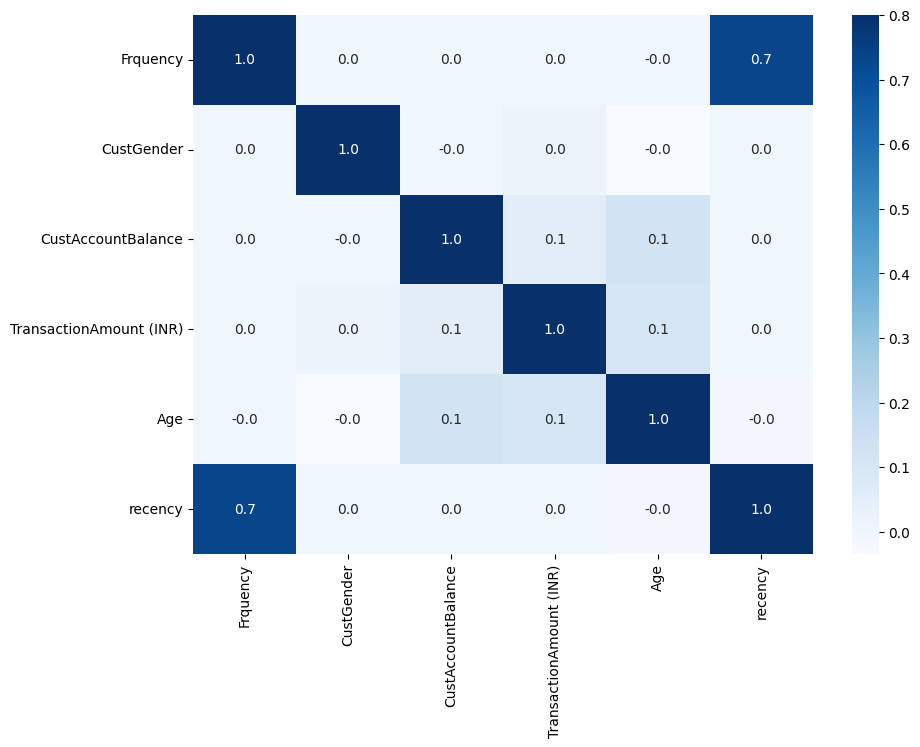

In [39]:
plt.figure(figsize=(10, 7))
correlation = ndf.corr(numeric_only=True)
sns.set_palette('Blues')
sns.heatmap(correlation, vmin=None, vmax=0.8, annot=True, fmt='.1f', linecolor='white', cbar=True, cmap='Blues')
plt.show()

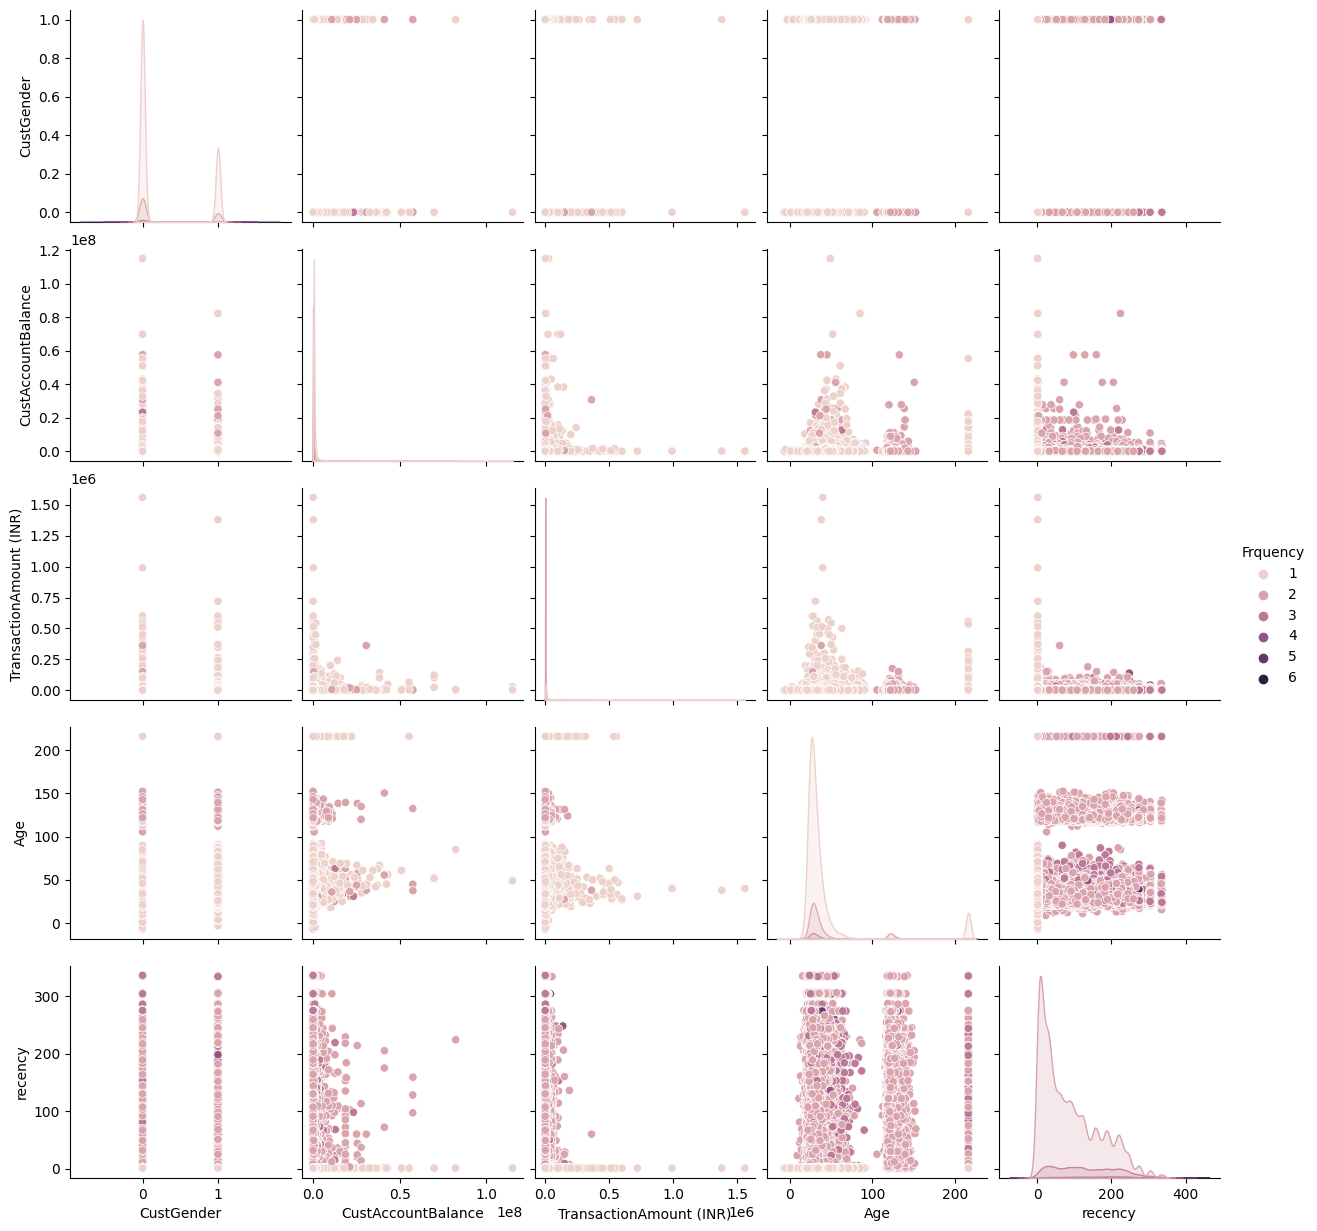

In [310]:
sns.pairplot(ndf, hue='Frquency')

In [40]:
ndf['Age'].describe()

count    826253.000000
mean         31.021900
std           8.390869
min          10.000000
25%          25.000000
50%          29.000000
75%          34.000000
max         105.500000
Name: Age, dtype: float64

<Axes: xlabel='Age', ylabel='Count'>

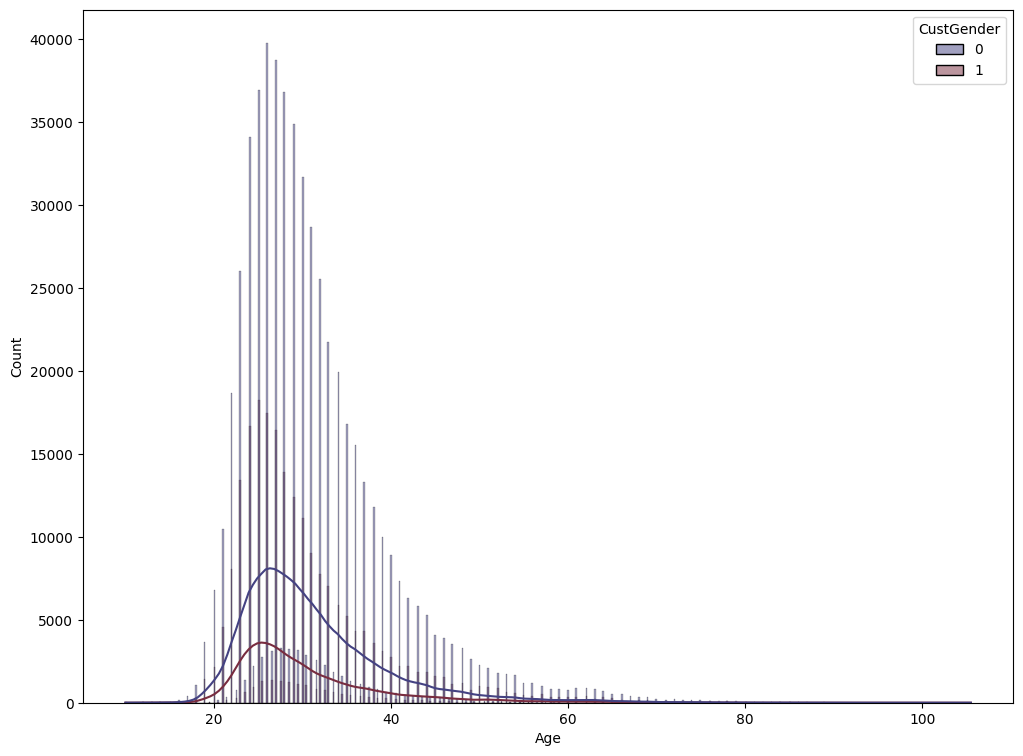

In [41]:
plt.figure(figsize=(12, 9))
sns.histplot(data=ndf, x='Age', hue='CustGender', palette='icefire', kde=True)

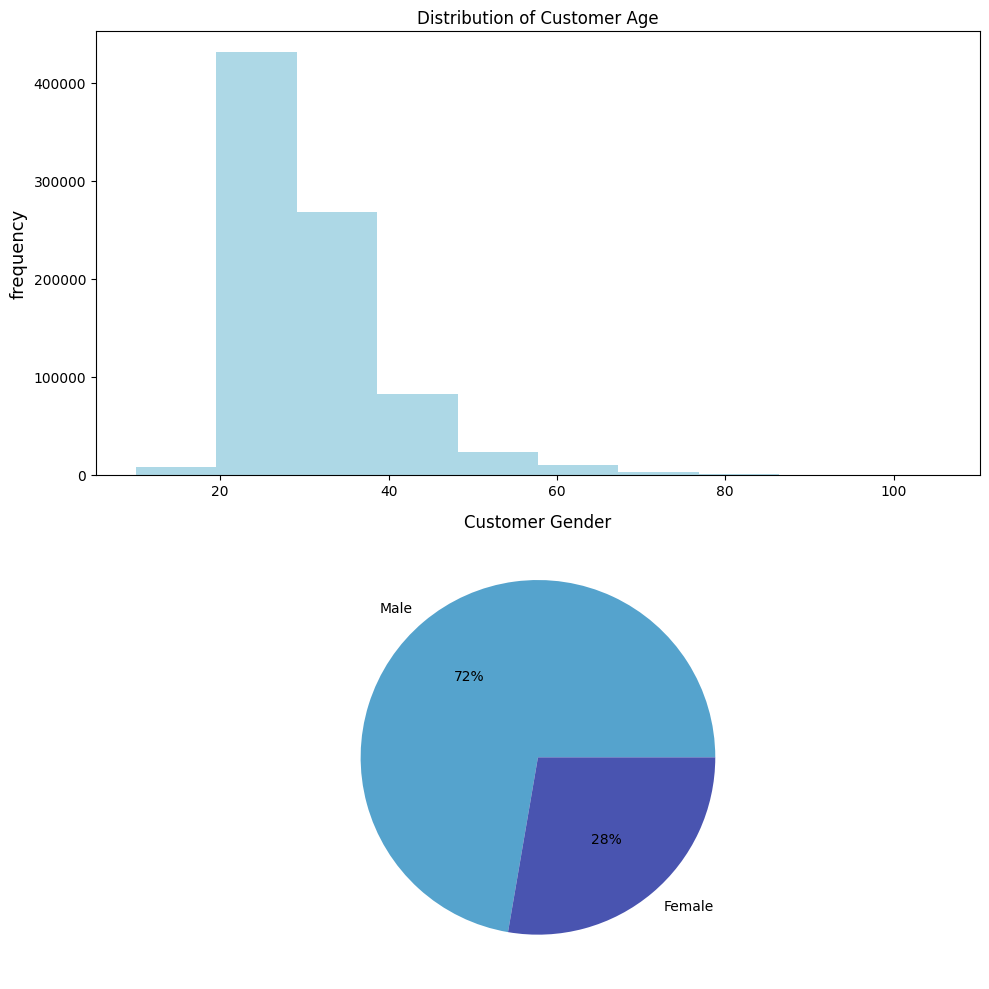

In [42]:
fig,ax=plt.subplots(ncols=1,nrows=2,figsize=(10,10))
palette_color = sns.color_palette('icefire')
ax[0].hist(x=ndf['Age'], color='lightblue')
ax[0].set_title("Distribution of Customer Age")
ax[0].set_ylabel("frequency", size=13)
ax[1].pie(ndf['CustGender'].value_counts(),autopct='%1.f%%',labels=['Male','Female'], colors=palette_color)
ax[1].set_title("Customer Gender")
plt.tight_layout();

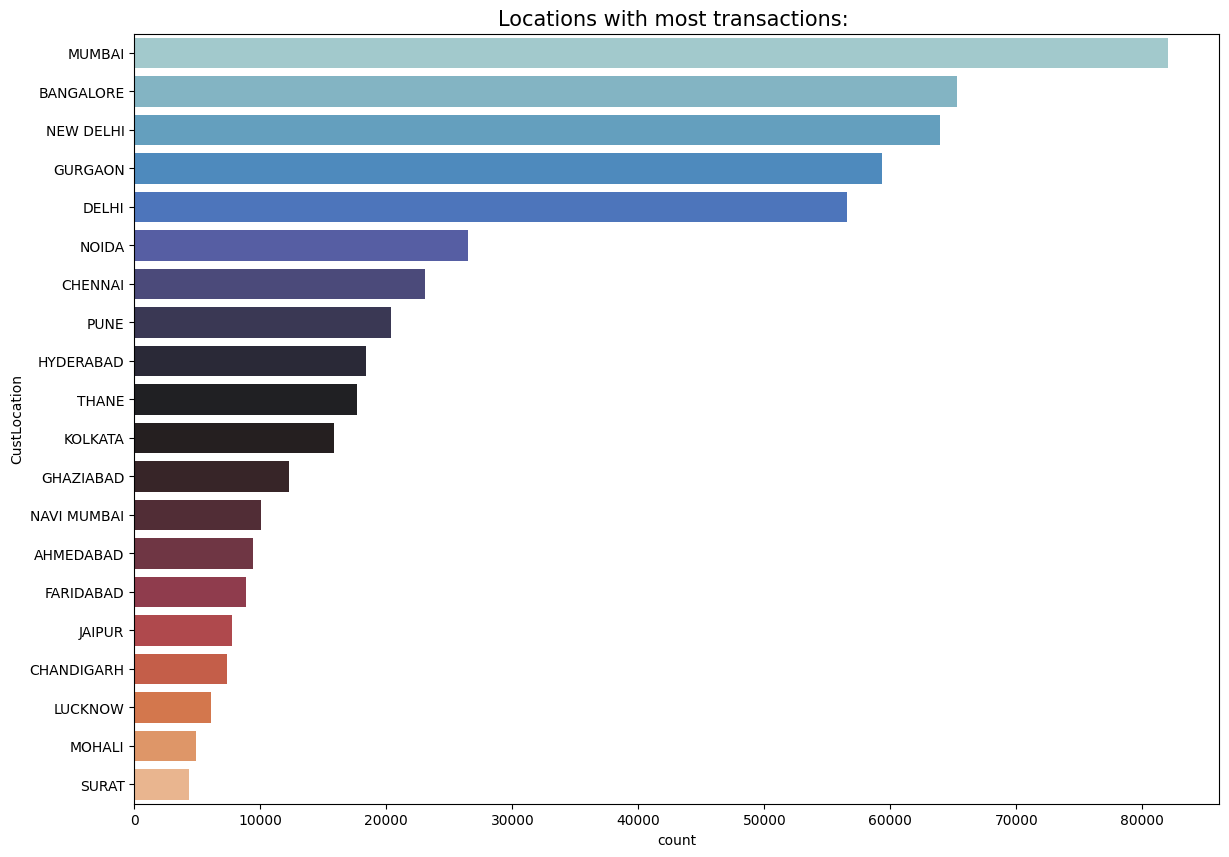

In [43]:
plt.figure(figsize=(14, 10))
chart = sns.countplot(y='CustLocation', data=ndf, palette='icefire', order=ndf['CustLocation'].value_counts()[:20].index)
plt.title("Locations with most transactions: ", fontsize=15)
plt.show()

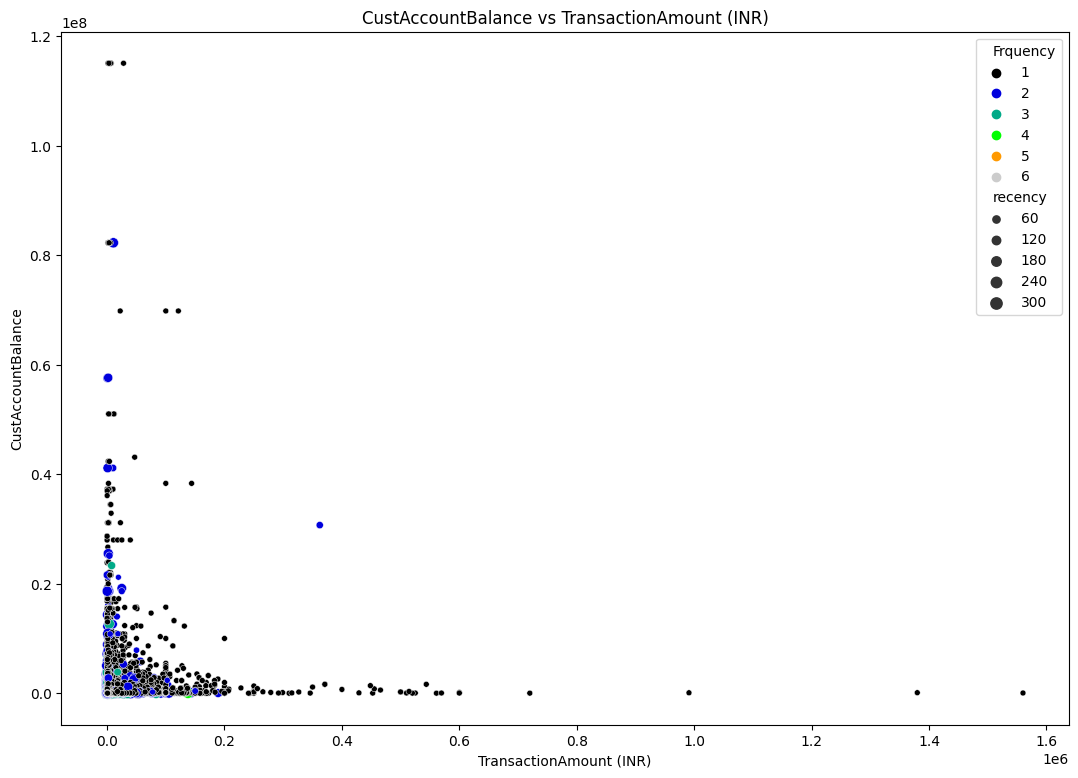

In [44]:
plt.figure(figsize=(13,9))
sns.scatterplot(data=ndf, x='TransactionAmount (INR)', y='CustAccountBalance', palette='nipy_spectral', hue='Frquency', size='recency')
plt.title("CustAccountBalance vs TransactionAmount (INR)", fontsize=12)
plt.show()

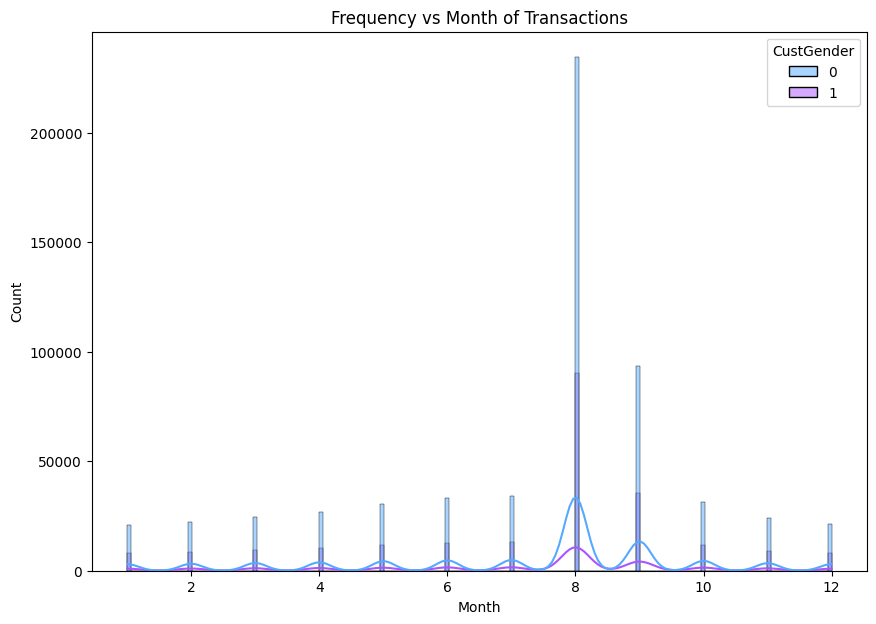

In [45]:
plt.figure(figsize=(10, 7))
plt.title("Frequency vs Month of Transactions")
ch2 = sns.histplot(data=ndf, x=ndf['TransactionDate'].dt.month, hue='CustGender', palette='cool', kde=True)
ch2.set_xlabel("Month")
plt.show()

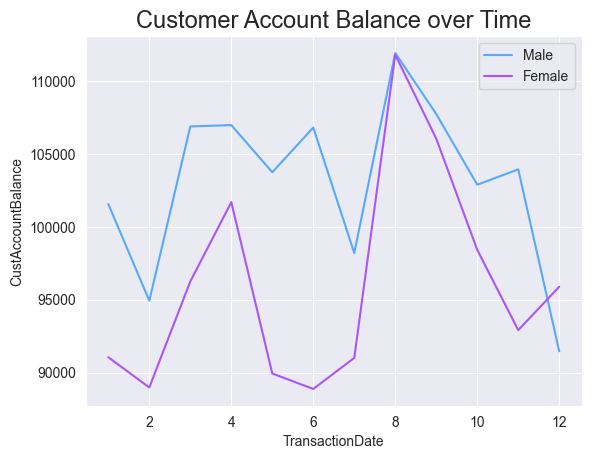

In [46]:
sns.set_style('darkgrid')
plt.title("Customer Account Balance over Time", fontsize=17)
sns.lineplot(data=ndf, x=ndf['TransactionDate'].dt.month, y='CustAccountBalance', errorbar=None, hue='CustGender', palette='cool')
plt.legend(['Male', 'Female'])
plt.show()

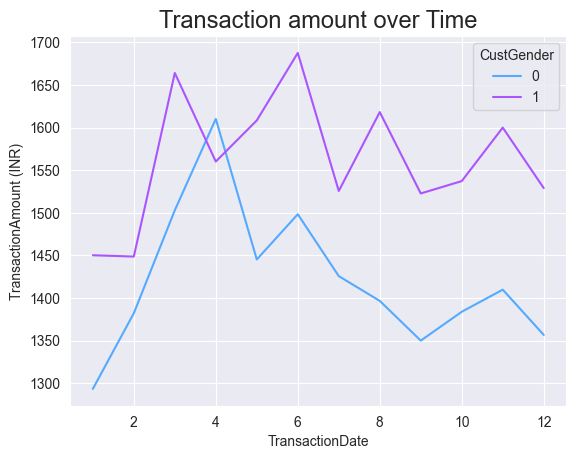

In [47]:
sns.set_style('darkgrid')
plt.title("Transaction amount over Time", fontsize=17)
sns.lineplot(data=ndf, x=ndf['TransactionDate'].dt.month, y='TransactionAmount (INR)', errorbar=None, hue='CustGender', palette='cool')
# plt.legend(['Male', 'Female'])
plt.show()

In [48]:
ndf.head()

,Frquency,CustGender,CustLocation,CustAccountBalance,TransactionAmount (INR),Age,TransactionDate,recency
0,2,1,NOIDA,76340.635,2553.0,28.5,2016-09-17,18
1,1,0,MUMBAI,24204.490,1499.0,22.0,2016-08-14,1
2,2,1,MUMBAI,100112.950,727.5,28.0,2016-04-08,182
3,1,1,CHAMPARAN,496.180,30.0,26.0,2016-09-15,1
4,1,0,KOLKATA,87058.650,5000.0,51.0,2016-08-18,1


In [49]:
le = LabelEncoder()
ndf['CustLocation'] = le.fit_transform(ndf['CustLocation'])

In [50]:
col_names = ndf.columns
ndf.head()

,Frquency,CustGender,CustLocation,CustAccountBalance,TransactionAmount (INR),Age,TransactionDate,recency
0,2,1,5009,76340.635,2553.0,28.5,2016-09-17,18
1,1,0,4493,24204.490,1499.0,22.0,2016-08-14,1
2,2,1,4493,100112.950,727.5,28.0,2016-04-08,182
3,1,1,1291,496.180,30.0,26.0,2016-09-15,1
4,1,0,3637,87058.650,5000.0,51.0,2016-08-18,1


In [51]:
ndf['month'] = ndf['TransactionDate'].dt.month
ndf.drop(columns=['TransactionDate'], inplace=True)
ndf.head()

,Frquency,CustGender,CustLocation,CustAccountBalance,TransactionAmount (INR),Age,recency,month
0,2,1,5009,76340.635,2553.0,28.5,18,9
1,1,0,4493,24204.490,1499.0,22.0,1,8
2,2,1,4493,100112.950,727.5,28.0,182,4
3,1,1,1291,496.180,30.0,26.0,1,9
4,1,0,3637,87058.650,5000.0,51.0,1,8


In [52]:
scaler = StandardScaler()
sdf = scaler.fit_transform(ndf)
sdf = pd.DataFrame(sdf, columns=col_names)
sdf.head()

,Frquency,CustGender,CustLocation,CustAccountBalance,TransactionAmount (INR),Age,TransactionDate,recency
0,1.826468,1.615539,0.746738,-0.038086,0.181367,-0.300553,0.054665,0.653002
1,-0.401555,-0.618988,0.492348,-0.105760,0.007211,-1.075205,-0.313740,0.258384
2,1.826468,1.615539,0.492348,-0.007229,-0.120267,-0.360142,3.608687,-1.320086
3,-0.401555,1.615539,-1.086247,-0.136534,-0.235517,-0.598496,-0.313740,0.653002
4,-0.401555,-0.618988,0.070338,-0.024174,0.585694,2.380935,-0.313740,0.258384


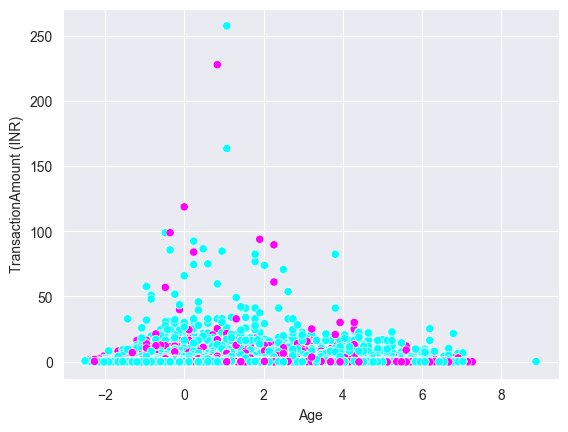

In [53]:
sns.scatterplot(data=sdf, x='Age', y='TransactionAmount (INR)', hue='CustGender', palette='cool', legend=False)
plt.show()

In [168]:
sdf2 = sdf.sample(frac=0.5)
sdf2.shape

(413126, 8)

In [169]:
X = sdf2[['Age','TransactionAmount (INR)']].values
Y = sdf2[['CustLocation','TransactionAmount (INR)']].values

In [170]:
# pip install yellowbrick

In [171]:
from yellowbrick.cluster import KElbowVisualizer
model = KMeans(init = 'k-means++', random_state = 37, n_init='auto')
visualizer = KElbowVisualizer(model, k=(2,30), timings=False)
visualizer2 = KElbowVisualizer(model, k=(2,30), timings=False)

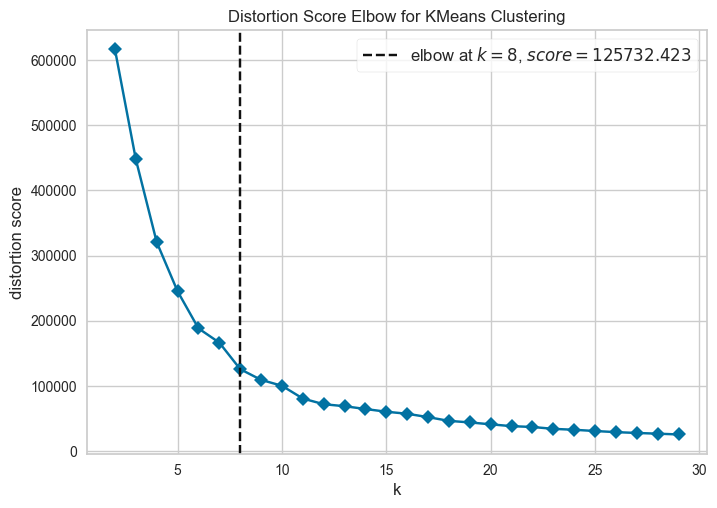

<Axes: title={'center': 'Distortion Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='distortion score'>

In [172]:
visualizer.fit(X)
visualizer.show()

In [173]:
kmeans_x = KMeans(n_clusters = 8, init = 'k-means++', random_state = 37, n_init='auto')
x_kmeans = kmeans_x.fit_predict(X)

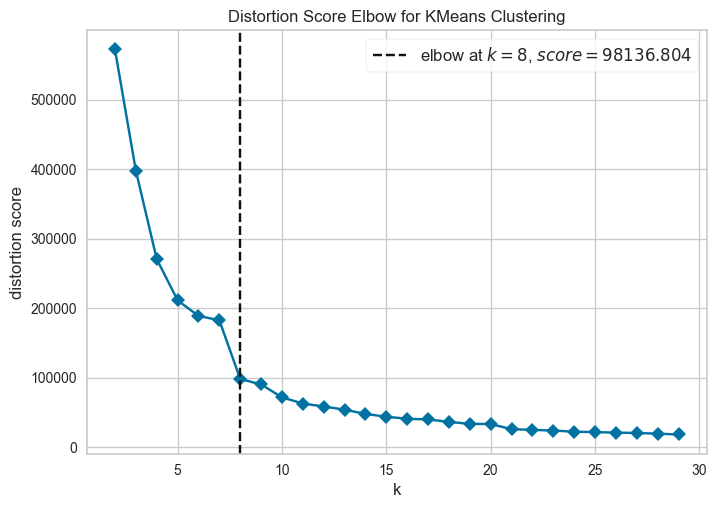

<Axes: title={'center': 'Distortion Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='distortion score'>

In [174]:
visualizer2.fit(Y)
visualizer2.show()

In [175]:
kmeans_y = KMeans(n_clusters = 8, init = 'k-means++', random_state = 37, n_init='auto')
y_kmeans = kmeans_y.fit_predict(Y)

In [176]:
centroids_x = kmeans_x.cluster_centers_
centroids_y = kmeans_y.cluster_centers_

print(centroids_x,centroids_y)

[[-6.76296293e-01 -1.21503153e-01]
 [ 1.44013497e+00  2.23331558e-02]
 [ 9.05690818e-01  1.19861115e+01]
 [ 6.98432587e-01  6.13068941e+01]
 [ 9.90533661e-01  2.16279987e+02]
 [ 3.72725952e-01  3.18380487e+00]
 [ 3.44748033e+00  9.41341208e-02]
 [ 2.33420615e-01 -5.36683657e-02]] [[-1.20241885e+00 -8.18013702e-02]
 [ 6.61012116e-01 -6.89900582e-02]
 [-5.10471086e-02  1.20503884e+01]
 [-2.00718349e-02  3.18352742e+00]
 [ 4.51429061e-01  2.16279987e+02]
 [ 8.74768192e-02  6.13068941e+01]
 [ 1.73553605e+00 -8.36741022e-02]
 [-3.23148290e-01 -8.13968651e-02]]


In [177]:
sdf2['cluster_age_km'] = x_kmeans
sdf2['cluster_location_km'] = y_kmeans
sdf2.head()

,Frquency,CustGender,CustLocation,CustAccountBalance,TransactionAmount (INR),Age,TransactionDate,recency,cluster_age_km,cluster_location_km
346867,-0.401555,-0.618988,-1.281477,-0.136816,-0.234030,-0.836851,-0.313740,0.258384,0,0
417464,-0.401555,1.615539,-0.434990,0.188272,-0.207427,0.354922,-0.313740,-0.925468,7,7
786147,-0.401555,-0.618988,0.492348,-0.134704,-0.177685,0.593276,-0.313740,0.258384,7,1
708051,1.826468,-0.618988,0.464247,-0.126906,0.011507,-0.479319,1.810005,-0.530851,0,1
745922,-0.401555,-0.618988,-0.005092,-0.122547,-0.199166,-1.075205,-0.313740,0.258384,0,7


In [178]:
cen_xx = [i[0] for i in centroids_x] 
cen_xy = [i[1] for i in centroids_x]

cen_yx = [i[0] for i in centroids_y] 
cen_yy = [i[1] for i in centroids_y]

sdf2['cen_xx'] = sdf2.cluster_age_km.map({0:cen_xx[0], 1:cen_xx[1], 2:cen_xx[2],3:cen_xx[3], 4:cen_xx[4], 5:cen_xx[5],6:cen_xx[6], 7:cen_xx[7]})
sdf2['cen_xy'] = sdf2.cluster_age_km.map({0:cen_xy[0], 1:cen_xy[1], 2:cen_xy[2],3:cen_xy[3], 4:cen_xy[4], 5:cen_xy[5],6:cen_xy[6], 7:cen_xy[7]})

sdf2['cen_yx'] = sdf2.cluster_location_km.map({0:cen_yx[0], 1:cen_yx[1], 2:cen_yx[2],3:cen_yx[3], 4:cen_yx[4], 5:cen_yx[5],6:cen_yx[6], 7:cen_yx[7]})
sdf2['cen_yy'] = sdf2.cluster_location_km.map({0:cen_yy[0], 1:cen_yy[1], 2:cen_yy[2],3:cen_yy[3], 4:cen_yy[4], 5:cen_yy[5],6:cen_yy[6], 7:cen_yy[7]})

colors = ['red', 'yellow', 'grey', 'green','blue','orange','pink','brown']
sdf2['color_age_km'] = sdf2.cluster_age_km.map({0:colors[0], 1:colors[1], 2:colors[2],3:colors[3],4:colors[4],5:colors[5],6:colors[6],7:colors[7]})
sdf2['color_location_km'] = sdf2.cluster_location_km.map({0:colors[0], 1:colors[1], 2:colors[2],3:colors[3],4:colors[4],5:colors[5],6:colors[6],7:colors[7]})

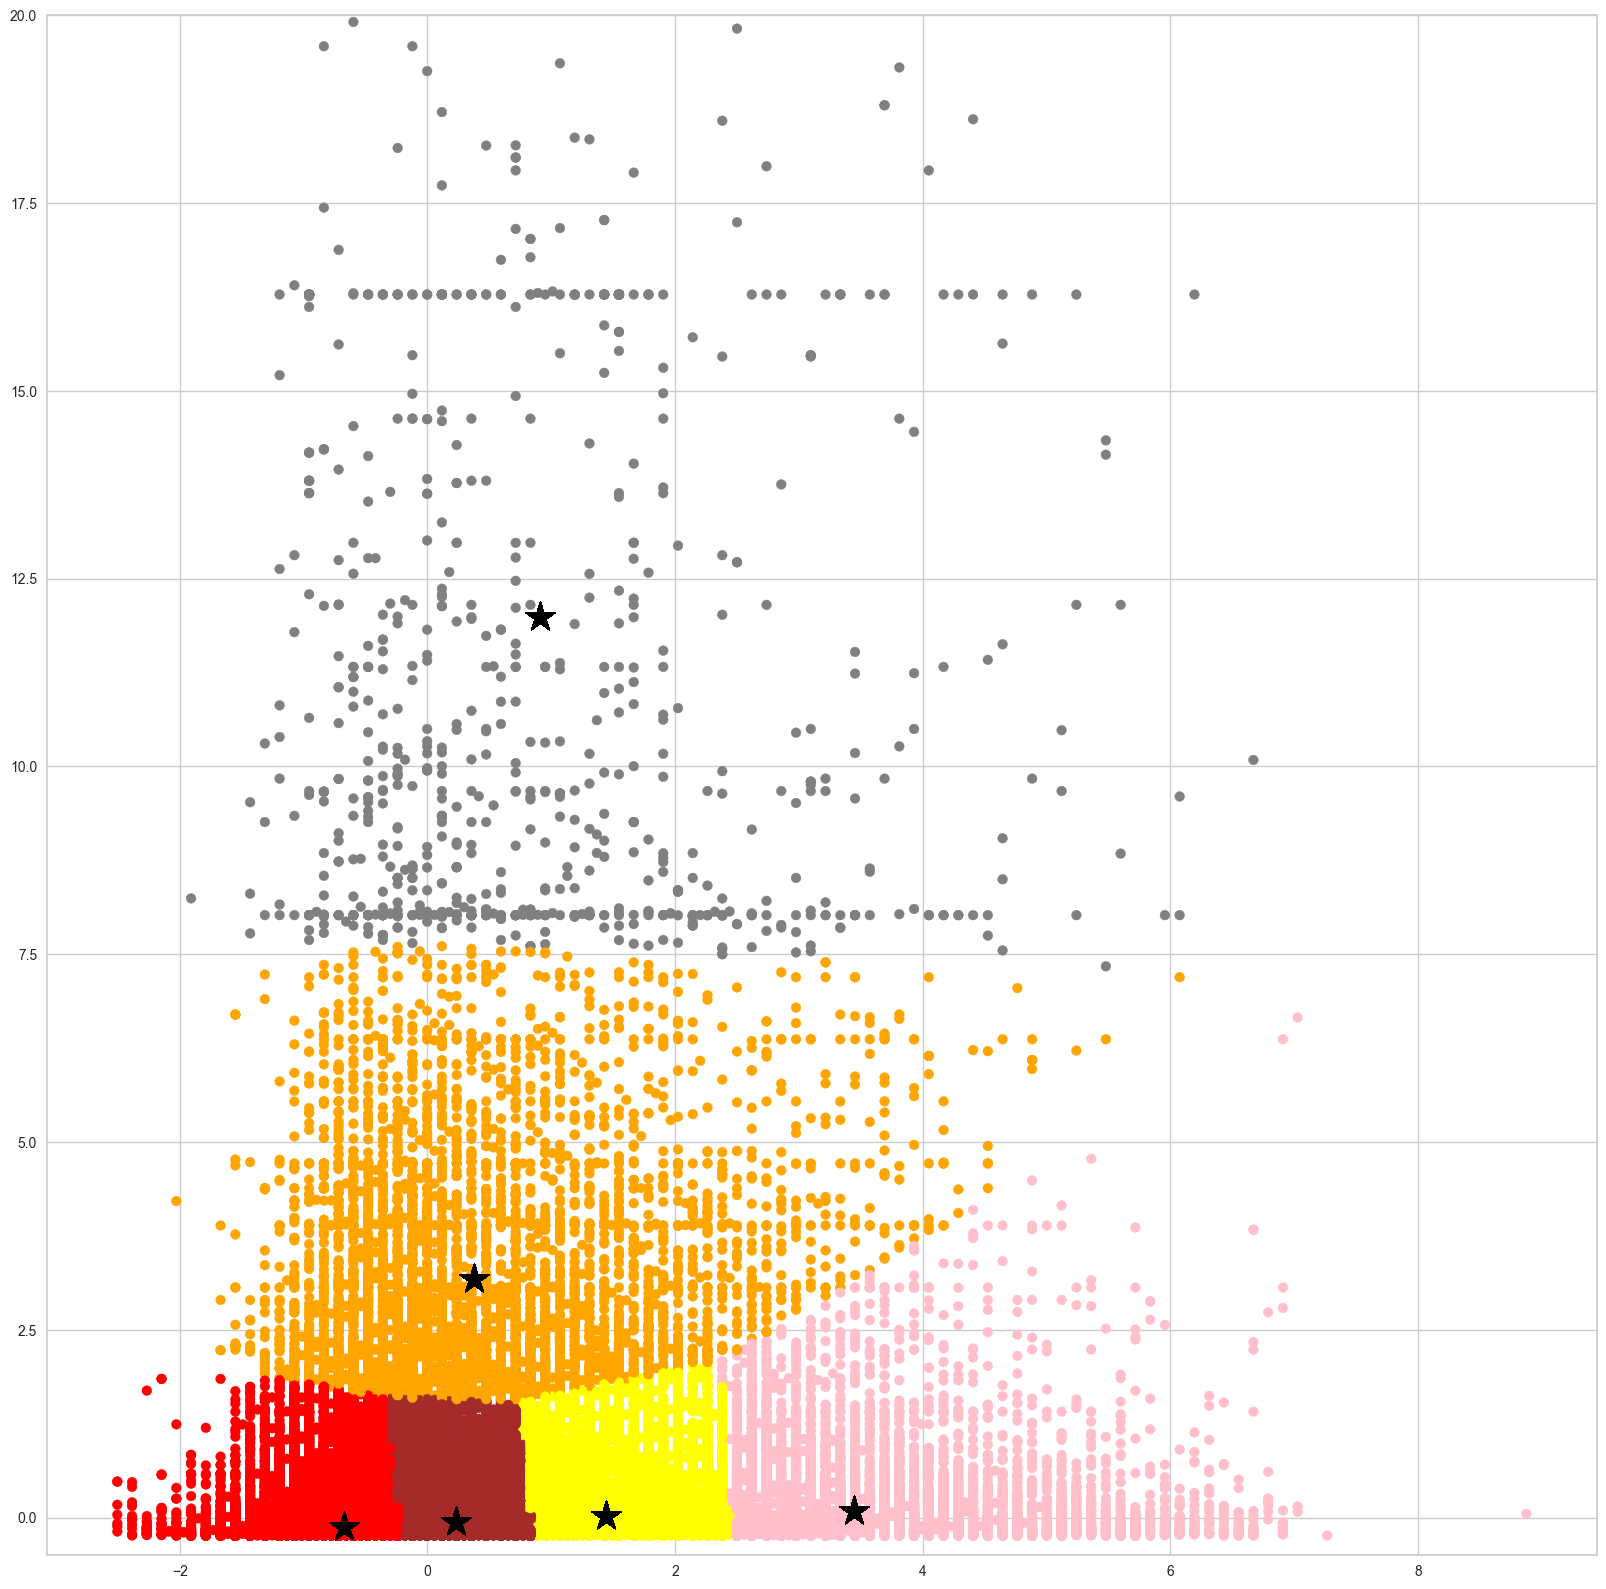

In [179]:
plt.figure(num=None, figsize=(20, 20), facecolor='w', edgecolor='k')
plt.scatter(sdf2['Age'], sdf2['TransactionAmount (INR)'], c=sdf2.color_age_km)
plt.scatter(sdf2['cen_xx'], sdf2['cen_xy'],marker = '*',s=500, c='black')
#plt.xlim([0, 100])
plt.ylim([-0.5, 20])
plt.show()

(-0.5, 20.0)

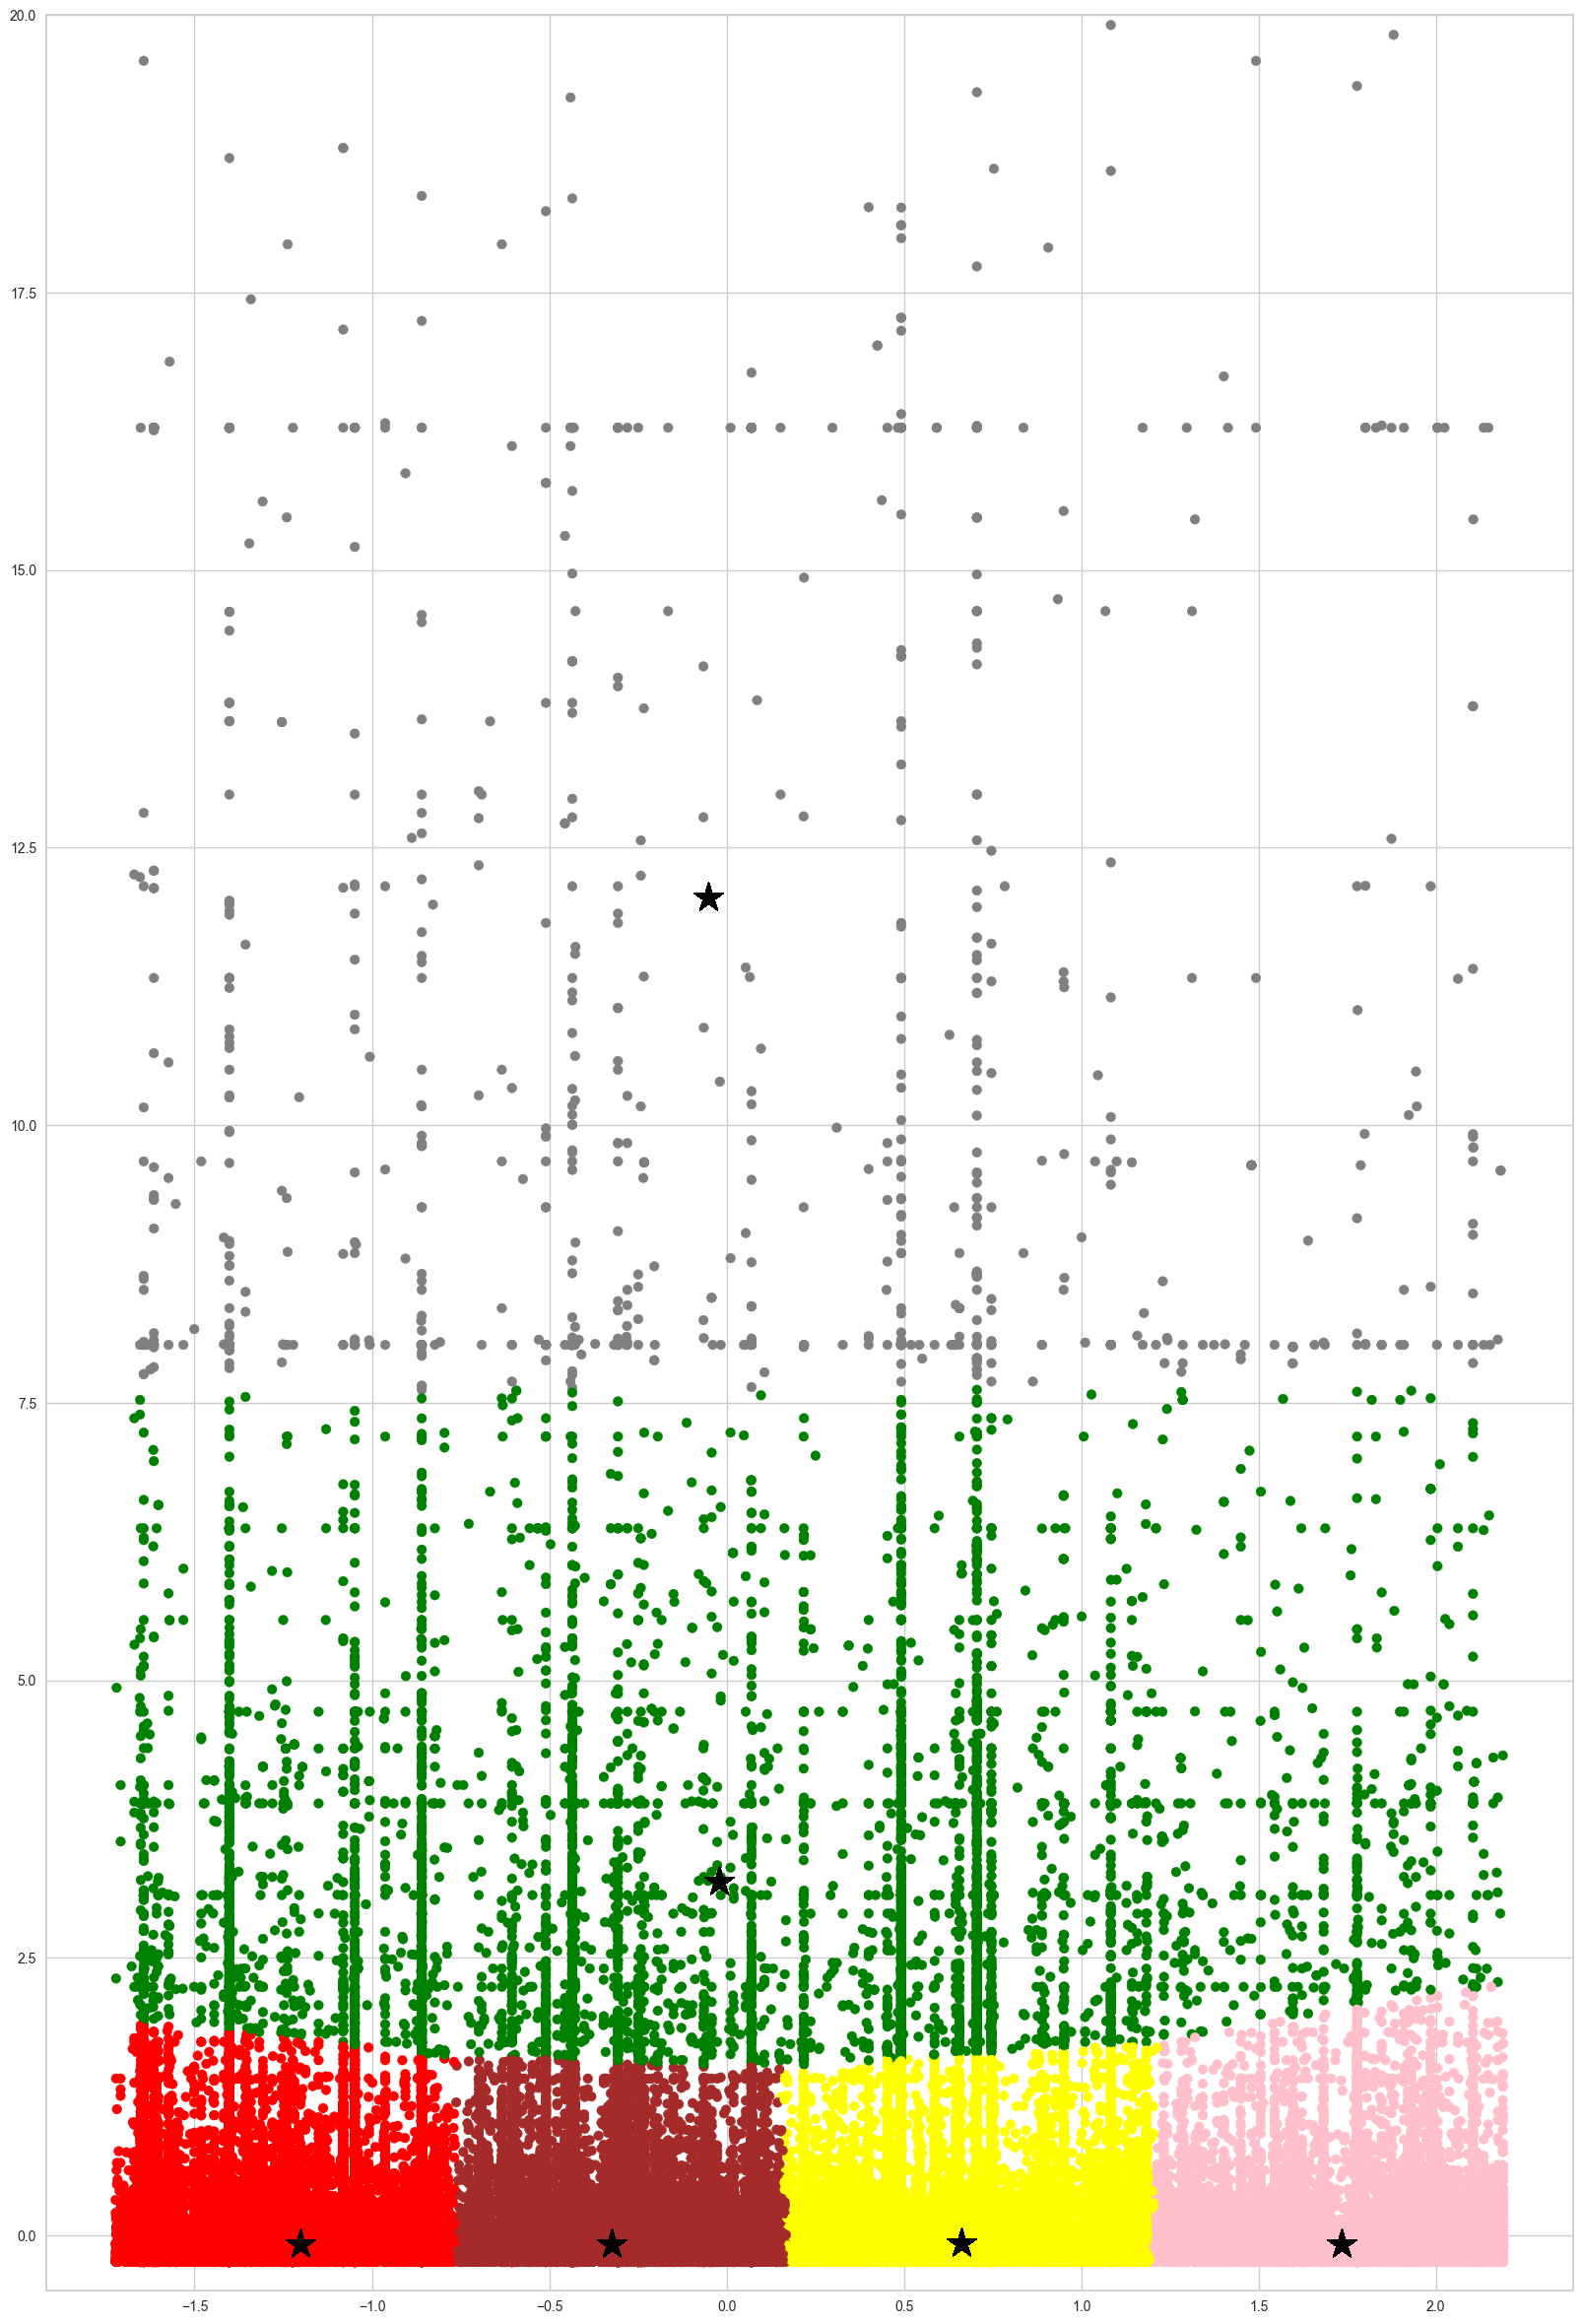

In [181]:
plt.figure(num=None, figsize=(20, 30), facecolor='w', edgecolor='k')
plt.scatter(sdf2['CustLocation'], sdf2['TransactionAmount (INR)'], c=sdf2.color_location_km)
plt.scatter(sdf2['cen_yx'], sdf2['cen_yy'],marker = '*',s=500, c='black')
#plt.xlim([0, 8500])
plt.ylim([-0.5, 20])

In [56]:
wcss = []
for i in range(1, 12):
    kmeans = KMeans(n_clusters=i, init='k-means++', random_state=13, n_init='auto')
    kmeans.fit(X)
    wcss.append(kmeans.inertia_)

print(wcss)

[858854.1420547664, 710192.6018934266, 415405.11992748454, 305776.99989731103, 229931.51381428854, 178850.79886128643, 148848.58908006008, 132392.3879910827, 113138.83196119644, 103864.22427164864, 82223.9320671997]


<Axes: >

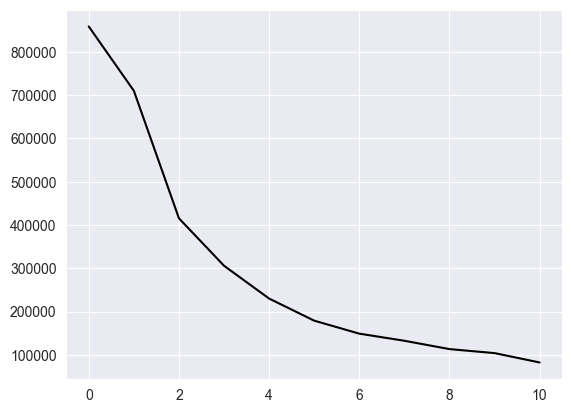

In [57]:
sns.lineplot(wcss, color='black')

In [502]:
kmeans = KMeans(n_clusters=3, init='k-means++', random_state=13, n_init='auto')
y_kmeans = kmeans.fit_predict(sdf2)

In [503]:
y_kmeans[:20]

array([1, 0, 2, 1, 0, 0, 2, 0, 0, 2, 2, 2, 1, 0, 0, 0, 2, 0, 1, 1])

In [58]:
# plt.figure(figsize=(20, 18))
# plt.scatter(X[y_kmeans == 0, 0], X[y_kmeans == 0, 1], s = 10, c = 'red', label = 'Cluster1')
# plt.scatter(X[y_kmeans == 1, 0], X[y_kmeans == 1, 1], s = 10, c = 'blue', label = 'Cluster2')
# plt.scatter(X[y_kmeans == 2, 0], X[y_kmeans == 2, 1], s = 10, c = 'green', label = 'Cluster3')
# plt.scatter(X[y_kmeans == 3, 0], X[y_kmeans == 3, 1], s = 10, c = 'violet', label = 'Cluster4')
# plt.scatter(X[y_kmeans == 4, 0], X[y_kmeans == 4, 1], s = 10, c = 'yellow', label = 'Cluster5') 
# plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s = 100, c = 'black', label = 'Centroids')
# # plt.xlabel('Annual Income (k$)') plt.ylabel('Spending Score (1-100)')

# plt.show()